<a href="https://colab.research.google.com/github/RodrigoFD03/SeriesDeTiempo_RFD_A01383352/blob/main/PronosticoTipodeCambio_RFD_A01383352.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Series de Tiempo
## Rodrigo Fuentes / A01383352
### Predicción Tipo de Cambio 09/03/2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [35]:
#tamaño de gráficas
plt.rcParams['figure.figsize']=[20,10]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
tipo_cambio=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tipo_de_cambio.csv")

In [7]:
tipo_cambio.tail()

,Date,tipo_cambio
1300,01/03/23,18.300940
1301,02/03/23,18.115971
1302,03/03/23,18.105301
1303,06/03/23,17.978001
1304,07/03/23,18.012699


In [16]:
tipo_cambio= tipo_cambio.set_index('Date')

In [17]:
tipo_cambio

,tipo_cambio
Date,
07/03/18,18.698299
08/03/18,18.625000
09/03/18,18.601000
12/03/18,18.575899
13/03/18,18.599581
...,...
01/03/23,18.300940
02/03/23,18.115971
03/03/23,18.105301


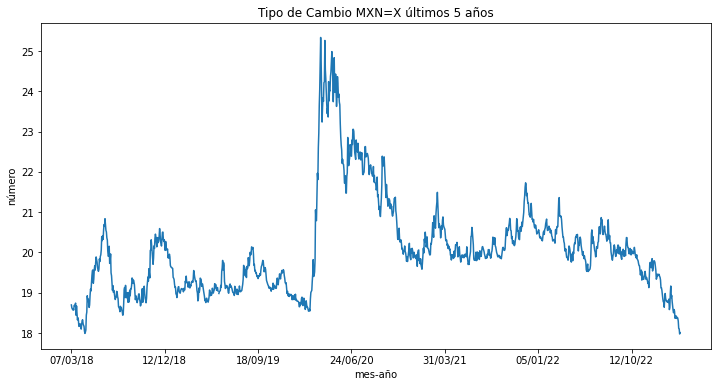

In [18]:
# comenzamos graficando la serie
# titulo y nombre a ejes
tipo_cambio["tipo_cambio"].plot()
plt.ylabel("número")
plt.xlabel("mes-año")
plt.title("Tipo de Cambio MXN=X últimos 5 años")
plt.show()

La serie es no estacionaria

**¿Cómo diferenciar una serie?**

In [21]:
# diferenciar serie
tipo_cambio['tipo_cambio_diff'] = tipo_cambio['tipo_cambio'].diff()

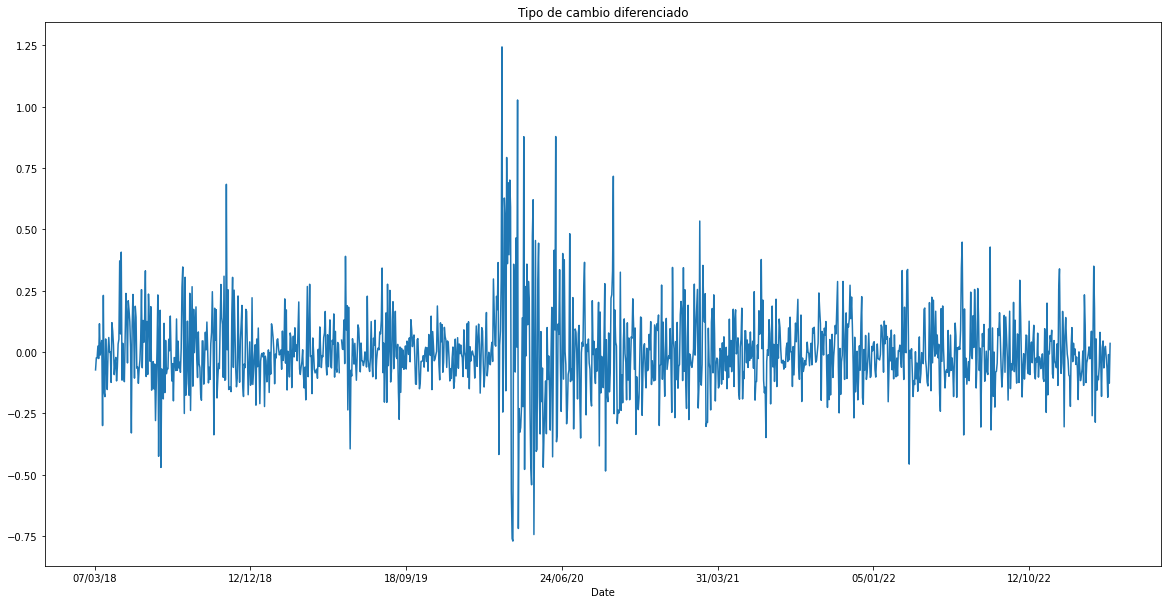

In [37]:
# graficamos esta nueva serie
tipo_cambio['tipo_cambio_diff'].plot()
plt.title('Tipo de cambio diferenciado')
plt.show()

Realizamos la prueba de raices unitaria

In [24]:
result_adf = adfuller(tipo_cambio['tipo_cambio_diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


Conclusión I
pvalue=0.00<0.05, rechazamos Ho, la serie es estacionaria

Si la serie es estacionaria, tratamos de identificar qué proceso es. Para eso vamos a ver la gráfica de autocorrelación y autocorrelación parcial

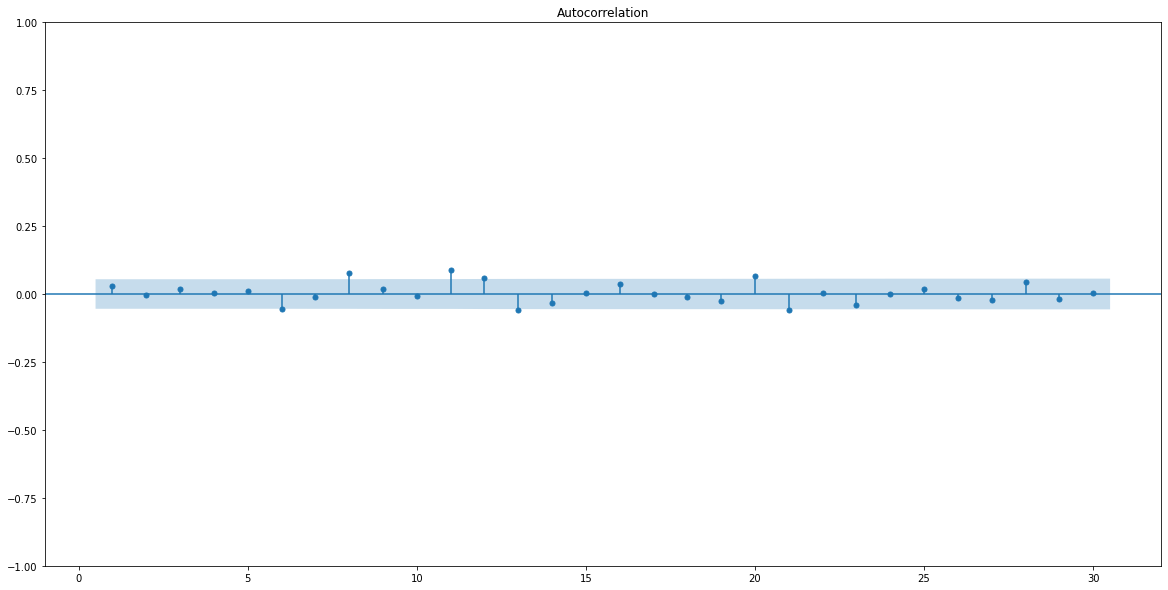

In [36]:
#plot_acf(serie, zero=False, lags=30);
plot_acf(tipo_cambio['tipo_cambio_diff'].dropna(), zero=False, lags=30);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


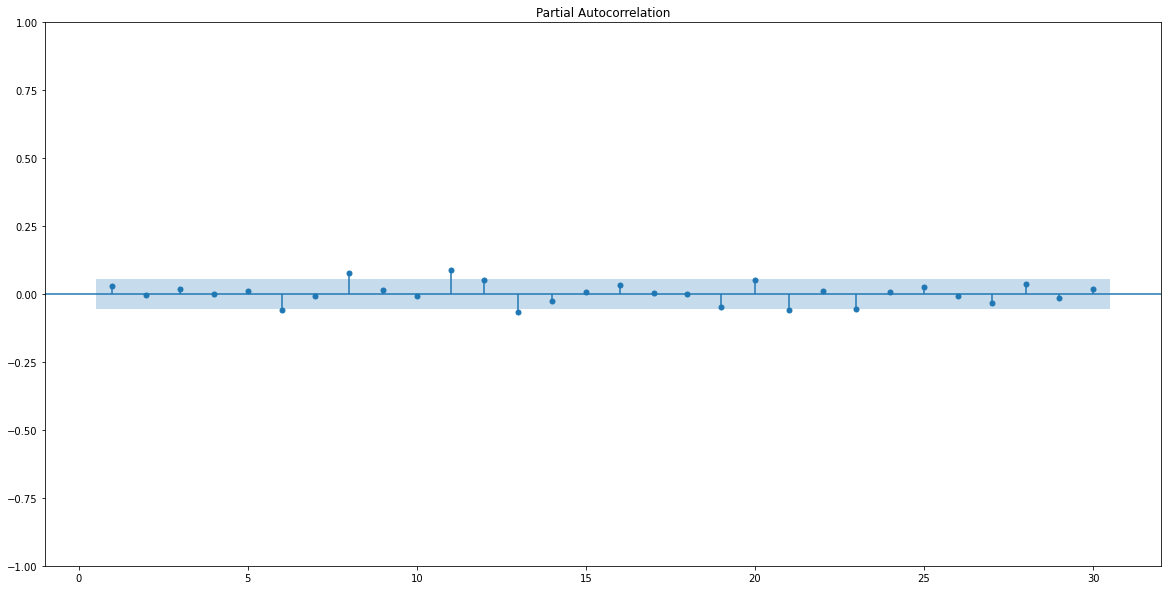

In [38]:
# plot_pacf(serie, zero = False,  lags=20);
plot_pacf(tipo_cambio['tipo_cambio_diff'].dropna(), zero=False, lags=30);

In [ ]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(tipo_cambio['tipo_cambio_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

In [29]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
2  4  -920.659415 -879.286160
6  2  -920.344198 -868.627630
2  5  -918.963201 -872.418290
   6  -917.813713 -866.097145
6  6  -917.510136 -845.106941
   3  -917.116964 -860.228739
3  6  -916.291742 -859.403517
   4  -915.891941 -869.347029
6  4  -915.852187 -853.792305
5  6  -915.214379 -847.982841
4  6  -914.843937 -852.784055
6  5  -914.658250 -847.426711
5  2  -914.590703 -868.045791
0  0  -914.452970 -904.109656
   1  -913.637547 -898.122577
1  0  -913.629526 -898.114556
3  5  -912.873346 -861.156778
1  1  -911.683056 -890.996429
0  2  -911.653354 -890.966727
2  0  -911.643623 -890.956996
4  5  -910.480148 -853.591923
0  3  -910.140278 -884.281994
3  0  -910.085418 -884.227134
1  2  -909.649195 -883.790911
2  1  -909.646102 -883.787818
3  3  -909.415427 -868.042172
5  3  -909.333312 -857.616744
2  2  -908.716839 -877.686898
6  0  -908.564437 -867.191183
0  6  -908.327832 -866.954577
4  3  -908.294942 -861.750031
0  4  -908.145001 -877.115060
1  3  -908.137630 -877.107689
4  0  -908.087703 -877.057762
3  1  -908.084479 -877.054538
   2  -906.754651 -870.553053
2  3  -906.593568 -870.391970
6  1  -906.592398 -860.047487
1  6  -906.570250 -860.025338
0  5  -906.314055 -870.112457
5  0  -906.240834 -870.039236
1  4  -906.146985 -869.945388
4  1  -906.087118 -869.885520
5  4  -905.383356 -848.495131
1  5  -905.000169 -863.626914
5  1  -904.970578 -863.597324
4  2  -904.087874 -862.714620
5  5  -903.941029 -841.881147
4  4  -902.274278 -850.557710

El mejor modelo según AIC es ARMA (2,4)

In [30]:
modelo1 = ARIMA(tipo_cambio['tipo_cambio'].dropna(), order=(0, 1, 2))
resultado1 = modelo1.fit()
print(resultado1.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

                               SARIMAX Results                                
Dep. Variable:            tipo_cambio   No. Observations:                 1304
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 460.613
Date:                Fri, 10 Mar 2023   AIC                           -915.226
Time:                        17:17:06   BIC                           -899.709
Sample:                             0   HQIC                          -909.405
                               - 1304                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0305      0.015      1.993      0.046       0.000       0.060
ma.L2         -0.0037      0.016     -0.225      0.822      -0.036       0.028
sigma2         0.0289      0.001     51.008      0.0

In [31]:
#realizamos pronostico
tipo_cambio['cambio_pronosticada'] =resultado1.predict()

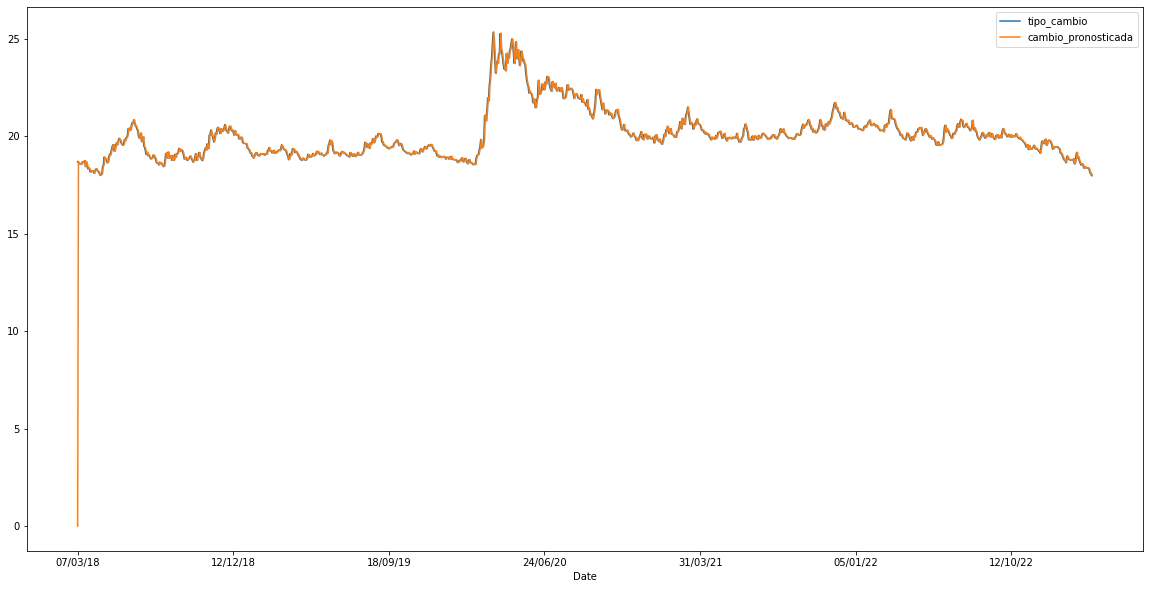

In [39]:
tipo_cambio[['tipo_cambio', 'cambio_pronosticada']].plot();


In [40]:
tipo_cambio.iloc[0]['cambio_pronosticada'] = tipo_cambio.iloc[0]['tipo_cambio']

In [41]:
tipo_cambio.describe()

,tipo_cambio,tipo_cambio_diff,cambio_pronosticada
count,1304.000000,1302.000000,1304.000000
mean,20.066082,-0.000478,20.066593
std,1.224394,0.170118,1.223996
min,17.978001,-0.771000,17.974127
25%,19.176488,-0.085477,19.178204
50%,19.919151,-0.011785,19.919205
75%,20.455425,0.073543,20.454748
max,25.336201,1.243000,25.351037


In [47]:
tipo_cambio.tail()

,tipo_cambio,tipo_cambio_diff,cambio_pronosticada
Date,,,
01/03/23,18.300940,-0.065959,18.366053
02/03/23,18.115971,-0.184969,18.299048
03/03/23,18.105301,-0.010670,18.110633
06/03/23,17.978001,-0.127300,18.105811
07/03/23,18.012699,0.034698,17.974127


In [49]:
resultado1.predict(1305,1329)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1305    18.014202
1306    18.014202
1307    18.014202
1308    18.014202
1309    18.014202
1310    18.014202
1311    18.014202
1312    18.014202
1313    18.014202
1314    18.014202
1315    18.014202
1316    18.014202
1317    18.014202
1318    18.014202
1319    18.014202
1320    18.014202
1321    18.014202
1322    18.014202
1323    18.014202
1324    18.014202
1325    18.014202
1326    18.014202
1327    18.014202
1328    18.014202
1329    18.014202
Name: predicted_mean, dtype: float64

El modelo pronostica que el tipo de cambio el primer día de abril será de 18.014202